# Guided Project: Clean and Analyse Exit Surveys

In this guided project, we worked with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

## Aim:
- To analyse various reasons of resignations mainly dissatisfaction.
- To analyse according to the age, experience and time worked at the company.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

- Most of the columns contain values of type object, including the fields corresponding to dates.
- There were also observed some values of type boolean(might help us in classifying type of resignation).
- In the last five columns, null values predominate almost entirely(most likely to be dropped).

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

<a id = "section"></a>
1. As some of the columns in both the columns are named different but imply the same, we might need to rename the columns so that there is order while combining the data and answering questions like:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

2. There are some cells in <code>dete_survey</code> which contain 'Not Stated' rather than Nan. While cleaning data we have to check uniformity in the columns, that is the values in the columns should have similar datatype and should basically belong to the same group as the other data. For example, if a column contains the marks of a student, we should make sure that there are no values which represent grades or percentage. 


3. There are many columns in both the surveys that are not needed for our analysis.



4. The number of columns in both the surveys are not same, we will need to filter the useful columns.
    


In [8]:
# solving point 2 as missing values are marked by 'Not Stated'
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')

## Cleaning Column Names

In [9]:
# column names are more ordered in dete_survey so we will rename columns in tafe_survey according to dete_survey
# first, we will uniform column names in dete_survey
dete_survey.columns = dete_survey.columns.str.strip().str.lower().str.replace(' ','_')
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [10]:
dete_survey.rename({'separationtype': 'separation_type'}, axis=1, inplace=True)
dete_survey.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
# renaming in tafe_survey
columns = {'Record ID': 'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment':'separation_type',
'Gender. What is your Gender?':'gender',
'CurrentAge. Current Age':'age',
'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service',
'Contributing Factors. Dissatisfaction':'factors_diss',
'Contributing Factors. Job Dissatisfaction':'factors_job_diss'
        }
tafe_survey = tafe_survey.rename(columns = columns)

In [12]:
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family', 'factors_diss',
       'factors_job_diss', 'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate oppor

## Dropping Columns

In [13]:
# now we will try to delete some columns we dont need
# columns 28-48 have denoted values with no particular meaning or there is no guide to weigh them
# hence it is of no use to us
# the last 5 columns in dete_survey is dominated by null values
dete_survey = dete_survey.drop(dete_survey.columns[-5:], axis = 1)
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [14]:
# we choose columns to drop on the same basis as we did for dete_survey
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [15]:
dete_survey.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,False,False,False,True,False,False,Female,61 or older


In [16]:
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [17]:
# checking for duplicates by id
dete_survey.duplicated(['id']).value_counts()

False    822
dtype: int64

In [18]:
tafe_survey.duplicated(['id']).value_counts()

False    702
dtype: int64

## Data Filtering (Resigned Employees)

For the development of this project we only need to focus on those people who resigned, that is why we'll filter both datasets taking as into account those values in the column <code>separation_type</code> that contain the word <b>'Resignation'</b>.

In [19]:
dete_survey['separation_type'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

Separation due to all <strong>resignation</strong> types is around 53% followed by Age Retirement at around 35%. Now we will see that <strong>resignation</strong> in tafe_survey is just less than 50 %. The high proportions of <strong>resignation</strong> types needs some answers which we will try to answer after preparing our data.

In [20]:
tafe_survey['separation_type'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separation_type, dtype: int64

In the DETE-Survey dataset we see that in the column separation_type there are 3 values containing the word <strong>'Resignation'</strong>. Whereas, in the TAFE-Survey dataset, there is only one.

In [21]:
# filtering out separation due to resignation
dete_survey['separationtype'] = dete_survey['separation_type'].str.split('-').str[0]
dete_resignations = dete_survey.copy()[dete_survey['separationtype'].str.contains(r'Resignation')]

In [22]:
tafe_resignations = tafe_survey.copy()[tafe_survey['separation_type'].str.contains(r'Resignation',na=False)]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Data Verification / Checking Validity

Now we will check the validity of dates and years in our dataset.
Starting with <span style = 'background:#FFFFFF'>`cease_date`</span>:, the last year of a person's employment should not be more than the current year(the year the data was created). Similarly,for <span style = 'background:#FFFFFF'>`date_start_date`</span> , we can say that people working here wont be over 60, and reasoning that they started working their in their 20's, we can say that the least value for this column can be around
1935.





In [23]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

This is what we discussed about [here](#section).

In [24]:
# cleaning the column by extracting the years
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(?P<Years>[1-2][0-9]{3})')
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [26]:
# no need to change or extract anyhtin here 
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We have verified the date columns and none of the dates has been violating our assumptions. We needed to verify this as we are to going to sort or filter the employees based on their experience.

## Calculating Experience/ Service Time

It is noiticable that the <code>tafe_resignations</code> dataframe already contains a "service" column, which we renamed to <code>institute_service</code>. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [27]:
dete_resignations['institute_service'] = (dete_resignations['dete_start_date'].astype(float)-dete_resignations['cease_date'].astype(float))*(-1)
dete_resignations['institute_service'].value_counts()

 5.0     23
 1.0     22
 3.0     20
-0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 10.0     6
 22.0     6
 14.0     6
 17.0     6
 12.0     6
 16.0     5
 18.0     5
 23.0     4
 11.0     4
 24.0     4
 39.0     3
 19.0     3
 21.0     3
 32.0     3
 28.0     2
 26.0     2
 25.0     2
 30.0     2
 36.0     2
 29.0     1
 33.0     1
 42.0     1
 27.0     1
 41.0     1
 35.0     1
 38.0     1
 34.0     1
 49.0     1
 31.0     1
Name: institute_service, dtype: int64

-  Excluding the null values of the <code>institute_service</code> field from the DETE dataset, we observe that 42%  of the employees worked at most 5 years.

In [28]:
dete_resignations['institute_service'].isnull().sum()

38

In [29]:
tafe_resignations['institute_service'].value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

As we can see from the values above, employee with relatively less experience have resigned in higher proportion.
- Excluding null values, 47% of the employees resignation from <code>TAFE</code> had worked for less than 2 years.

Also, when we combine the datasets, <code>institute_service</code> in <code>TAFE</code> should have the same format as in <code>DETE</code>. We will deal with this later in tis notebook.

After a bit of cleaning and preparing our data for analysis, now we will have to classify employees as dissatsfied and then filter them according to their experience to answer our question.

## Identification of Dissatisfied Employees

Also, we will work with <code>dete_resignations</code> and <code>tafe_resignations</code> as the dataset has data corresponding to resigned employees only.
In <code>dete_resignations</code>, I think the following columns contribute to the employee's decision:
- 13  Job dissatisfaction                   
- 14  Dissatisfaction with the department
- 15  Physical work environment              
- 16  Lack of recognition                  
- 17  Lack of job security                   
- 18  Work location                          
- 19  Employment conditions                  
- 20  Maternity/family                       
- 21  Relocation                            
- 22  Study/Travel                           
- 23  Ill Health                             
- 24  Traumatic incident                    
- 25  Work life balance                      
- 26  Workload

In [30]:
dete_resignations.loc[:,'job_dissatisfaction':'workload']

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,True,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False,True,False,False,False,False
819,False,False,False,False,False,False,False,True,True,False,False,False,True,False




So since these columns have boolean input values, even if one of the column to a corresponding row states false, then that employee will be classified as 'dissatisfied'.
Before proceeding, I think we should not include columns such from <code>maternity/family</code> to <code>traumatic_incident</code> in columns such as <code>dissatisfied</code> as they are not related to the institute.

In [31]:
# we will create a column 'dissatisfied' which will be of Boolean type
# the role of 'any' is to return whether any element is True
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1,skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [32]:
dete_resignations_up['dissatisfied'].head()

3     False
5      True
8     False
9      True
11    False
Name: dissatisfied, dtype: bool

In [33]:
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Similarly for <code>tefe_resignations</code> we will include two columns:
- <code>Contributing Factors. Dissatisfaction</code>
- <code>Contributing Factors. Job Dissatisfaction</code>

In [34]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['factors_diss','factors_job_diss']].applymap(update_vals).any(1,skipna=False)
tafe_resignations['dissatisfied'].head()
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

## Combining DataFrames

We have performed various actions to clean and filter our data. Now we will be reeady to merge iot. Also, as we practiced in some lessons before, while merging it is better that each dataset has it as own identity. We have given an identity to each dataste by dedicating a column with their title.

In [35]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [36]:
# combining
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.shape

(651, 49)

In [37]:
combined_null = combined.isnull().sum()
combined_null

id                                                       0
separation_type                                          0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [38]:
# we will drop the following columns 
columns_drop = combined_null[combined_null >= 400]

In [39]:
combined = combined.dropna(thresh = 200, axis = 1)
combined

,id,separation_type,cease_date,dete_start_date,role_start_date,position,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,factors_diss,factors_job_diss,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Central Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,Central Office,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,North Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,Permanent Part-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Far North Queensland,Permanent Full-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,Temporary Full-time,NaN,NaN,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,Temporary Full-time,NaN,NaN,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,Permanent Full-time,NaN,NaN,...,-,-,-,-,-,-,-,Other,-,1-2


In [40]:
combined['institute_service']

0        7
1       18
2        3
3       15
4        3
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object

In [41]:
# the column is pretty inconsistent with its value(due to tafe_survey)
type(combined['institute_service'][2])

float

In [42]:
# column consists of diffeent dtypes, so direct string operation is impossible
type(combined['institute_service'][640])

str

In [43]:
combined.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,factors_diss,factors_job_diss,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Central Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,Central Office,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,North Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,Permanent Part-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Far North Queensland,Permanent Full-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Classifying Employees by Length of Service

We would rather classify the employees according to a range of experience as years as it is effective to from classes. Our classification is as follows:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [44]:
def service_category(val):
    if pd.isna(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [45]:
# combined['institute_service'].astype('str')
combined['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
-0.0                  20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
12.0                   6
10.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [46]:
combined['institute_service'] = combined['institute_service'].astype('str')
type(combined['institute_service'][0])

str

In [47]:
# cleaning columns entries/ transforming them into the same format
def clean(val):
    if pd.isna(val):
        return np.nan
    if '-' in val:
        return float(val[-1])
    else:
        res = [i for i in val.split()]
        return res[0]
    
combined['institute_service'] = combined['institute_service'].apply(clean)
combined['institute_service']

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646       6
647       2
648     nan
649       6
650       4
Name: institute_service, Length: 651, dtype: object

In [48]:
combined['institute_service'][combined['institute_service'] == 'Less'] = 1.0
combined['institute_service'][combined['institute_service'] == 'More'] = 20.0
combined['institute_service'] = combined['institute_service'].astype('float')
combined['institute_service'].value_counts(dropna = False)

<ipython-input-48-a83c5348b3b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['institute_service'][combined['institute_service'] == 'Less'] = 1.0
<ipython-input-48-a83c5348b3b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['institute_service'][combined['institute_service'] == 'More'] = 20.0


1.0     95
NaN     88
4.0     79
2.0     78
0.0     67
6.0     50
5.0     23
3.0     20
20.0    17
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
10.0     6
12.0     6
17.0     6
22.0     6
14.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
19.0     3
21.0     3
39.0     3
32.0     3
26.0     2
30.0     2
36.0     2
28.0     2
25.0     2
29.0     1
42.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [49]:
combined['institute_service'] = combined['institute_service'].astype('float')
combined['institute_service'].value_counts(dropna = False)

1.0     95
NaN     88
4.0     79
2.0     78
0.0     67
6.0     50
5.0     23
3.0     20
20.0    17
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
10.0     6
12.0     6
17.0     6
22.0     6
14.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
19.0     3
21.0     3
39.0     3
32.0     3
26.0     2
30.0     2
36.0     2
28.0     2
25.0     2
29.0     1
42.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [50]:
combined['service_cat'] = combined['institute_service'].apply(service_category)

combined['service_cat'].value_counts(dropna=False)

New            240
Experienced    172
Veteran        110
NaN             88
Established     41
Name: service_cat, dtype: int64

In [51]:
combined['age'] 

0       36-40
1       41-45
2       31-35
3       46-50
4       31-35
        ...  
646    21  25
647     51-55
648       NaN
649     51-55
650    26  30
Name: age, Length: 651, dtype: object

In [52]:
def convert_range(val):
    if pd.notna(val):
        if ' ' in val:
            numbers = [int(i) for i in val.split() if i.isdigit()]
        else:
            numbers = [int(i) for i in val.split('-') if i.isdigit()]
        return int(sum(numbers) / len(numbers))
    return np.nan
combined['age'] = combined['age'].apply(convert_range)

In [53]:
combined['age'].value_counts(dropna = False)

43.0    93
48.0    81
38.0    73
53.0    71
28.0    67
23.0    62
33.0    61
NaN     55
56.0    29
58.0    26
61.0    23
20.0    10
Name: age, dtype: int64

In [54]:
def age_category(val):
    if pd.isna(val):
        return np.nan
    elif val < 31:
        return 'Junior'
    elif val < 46:
        return 'Middle'
    else:
        return 'Senior'

combined['age'] = combined['age'].astype('float')

combined['age_cat'] = combined['age'].apply(age_category)

combined['age_cat'].value_counts(dropna=False)

Senior    230
Middle    227
Junior    139
NaN        55
Name: age_cat, dtype: int64

## Removing Irrelevant columns / Keeping Relevant Columns

Since we have already used some columns to decide dissatisfaction, we no longer need those columns anymore. Hence, we will identify and keep only the columns we need for our analysis.

In [55]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separation_type                                      651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   region                                               265 non-null    object 
 7   employment_status                                    597 non-null    object 
 8   career_move_to_public_sector                         311 non-null    o

In [56]:
# other columns are needed for our analysis. We our choosing the columns according to the question we are trying to
# answer. We even dropped the bolean columns as we had used their information to create a new column which turns 
# out to be more precise
combined = combined[['id', 'cease_date', 'position', 'employment_status', 'gender', 'age', 
                     'institute_service', 'dissatisfied','institute','service_cat','age_cat']]
combined.sample(5)

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
67,2.130000e+02,2012.0,Teacher,Permanent Part-time,Male,61.0,26.0,True,DETE,Veteran,Senior
215,5.870000e+02,2010.0,Teacher,Permanent Part-time,Female,53.0,11.0,False,DETE,Veteran,Senior
161,4.500000e+02,2012.0,Teacher,Permanent Full-time,Male,38.0,NaN,True,DETE,NaN,Middle
357,6.342272e+17,2010.0,Professional Officer (PO),Permanent Full-time,Female,38.0,0.0,True,TAFE,New,Middle
250,6.720000e+02,2013.0,"School Based Professional Staff (Therapist, nu...",Temporary Full-time,Female,23.0,0.0,False,DETE,New,Junior


## Handling missing values in <code>combined</code>


In [57]:
combined.isnull().sum()

id                    0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
service_cat          88
age_cat              55
dtype: int64

In [58]:
index = combined['dissatisfied'].isna()
index

0      False
1      False
2      False
3      False
4      False
       ...  
646    False
647    False
648    False
649    False
650    False
Name: dissatisfied, Length: 651, dtype: bool

In [59]:
combined.loc[index,'dissatisfied']

322    NaN
324    NaN
345    NaN
466    NaN
472    NaN
523    NaN
543    NaN
627    NaN
Name: dissatisfied, dtype: object

About 1% values in <code>dissatisfied</code> is null so we can fill it with the majority value that is 'False'. 

In [60]:
combined.loc[index,'dissatisfied'] = False

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [61]:
#combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [62]:
combined.isnull().sum()

id                    0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
age_cat              55
dtype: int64

In the columns <code>age</code> with its corresponding <code>age_cat</code> and <code>institute_service</code> with its corresponding service_cat, we observe a significant amount of missing values.

In [63]:
# checking where the columns intersect
age_service_null_bool = (combined['service_cat'].isnull()) & (combined['age_cat'].isnull())
age_service_null = combined[age_service_null_bool]
age_service_null

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
141,4.060000e+02,2012.0,Teacher,NaN,NaN,NaN,NaN,False,DETE,NaN,NaN
301,8.040000e+02,2013.0,Teacher Aide,Permanent Part-time,NaN,NaN,NaN,False,DETE,NaN,NaN
310,8.230000e+02,2013.0,Teacher Aide,NaN,NaN,NaN,NaN,False,DETE,NaN,NaN
311,6.341399e+17,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
322,6.341770e+17,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
324,6.341779e+17,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
325,6.341820e+17,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
326,6.341821e+17,2010.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN,NaN
327,6.341831e+17,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
331,6.341934e+17,2010.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN,NaN


These are all null correspondingly so even if we want to fill in the missing values, we cant as the emloyee's data is missing in all columns.

In [64]:
combined.drop(combined[age_service_null_bool].index, inplace=True)
combined.reset_index(drop=True, inplace=True)

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
combined

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
0,4.000000e+00,2012.0,Teacher,Permanent Full-time,Female,38.0,7.0,False,DETE,Established,Middle
1,6.000000e+00,2012.0,Guidance Officer,Permanent Full-time,Female,43.0,18.0,True,DETE,Veteran,Middle
2,9.000000e+00,2012.0,Teacher,Permanent Full-time,Female,33.0,3.0,False,DETE,Experienced,Middle
3,1.000000e+01,2012.0,Teacher Aide,Permanent Part-time,Female,48.0,15.0,True,DETE,Veteran,Senior
4,1.200000e+01,2012.0,Teacher,Permanent Full-time,Male,33.0,3.0,False,DETE,Experienced,Middle
...,...,...,...,...,...,...,...,...,...,...,...
593,6.350599e+17,2013.0,Administration (AO),Temporary Full-time,Female,28.0,2.0,False,TAFE,New,Junior
594,6.350660e+17,2013.0,Operational (OO),Temporary Full-time,Male,23.0,6.0,False,TAFE,Experienced,Junior
595,6.350668e+17,2013.0,Teacher (including LVT),Temporary Full-time,Male,53.0,2.0,False,TAFE,New,Senior
596,6.350704e+17,2013.0,Teacher (including LVT),Permanent Full-time,Female,53.0,6.0,False,TAFE,Experienced,Senior


We have now eliminated correspponding null values of <code>age_cat</code> and <code>service_cat</code>. Since our question is dependent on these columns, we will try to fill the missing values. Our next step would be to fill both those columns using information from each other. 

In [66]:
service_null = combined[combined['service_cat'].isnull()]
service_null

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
7,17.0,2012.0,Teacher Aide,Permanent Part-time,Male,61.0,NaN,True,DETE,NaN,Senior
17,40.0,2012.0,Teacher,Permanent Full-time,Female,23.0,NaN,True,DETE,NaN,Junior
37,107.0,2012.0,Teacher Aide,Temporary Part-time,Female,48.0,NaN,True,DETE,NaN,Senior
50,141.0,2012.0,Teacher Aide,Permanent Part-time,Female,53.0,NaN,False,DETE,NaN,Senior
62,197.0,2012.0,Teacher Aide,Permanent Part-time,Female,48.0,NaN,False,DETE,NaN,Senior
95,289.0,2013.0,Public Servant,Permanent Full-time,Female,28.0,NaN,True,DETE,NaN,Junior
96,292.0,2013.0,Teacher Aide,Permanent Part-time,Female,58.0,NaN,False,DETE,NaN,Senior
97,294.0,2012.0,Schools Officer,Permanent Part-time,NaN,61.0,NaN,False,DETE,NaN,Senior
101,302.0,2012.0,School Administrative Staff,Permanent Part-time,Female,48.0,NaN,False,DETE,NaN,Senior
117,344.0,2012.0,School Administrative Staff,Permanent Part-time,Female,43.0,NaN,False,DETE,NaN,Middle


To fill in values in <code>service_cat</code>, we will fill in the most frequent groups that the corresponding age group represents.
Our boolean indexing will also state as institute to be 'DETE' because even thought the data is combined, corresponding values for age and service category depend on the separate institution.

In [67]:
age_cat_list = ['Junior','Middle','Senior']


for i in age_cat_list:
    print(i,":")
    print(combined[(combined['institute'] == 'DETE')&(combined['age_cat'] == i)]['service_cat'].value_counts())

Junior :
Experienced    27
New            23
Established     8
Name: service_cat, dtype: int64
Middle :
Experienced    33
Veteran        32
New            24
Established    20
Name: service_cat, dtype: int64
Senior :
Veteran        67
Experienced    16
Established    13
New             8
Name: service_cat, dtype: int64


In [68]:
service_null['institute'].unique()

array(['DETE'], dtype=object)

Since only DETE is the institute for which <code>service_cat</code>, we dont have to search for corresponding age groups for TAFE.

From above, we can say that:
- We will fill in the values in the service_cat field, where the value of the age_cat field is Junior, with the 'Experienced'
- We will fill in the values in the service_cat field, where the value of the age_cat field is Middle, with the 'Veteran'.
-  We will fill in the values in the service_cat field, where the value of the age_cat field is Senior, with the 'Veteran'.

In [69]:
max_values = ['Experienced', 'Established', 'Veteran']


In [70]:
for i,j in zip(age_cat_list,max_values):
    sort_bool = (combined['institute'] == 'DETE') & (combined['age_cat'] == i) & (combined['institute_service'].isnull())
    combined.loc[sort_bool,'service_cat'] = j

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [71]:
combined['service_cat'].isnull().sum()

0

In [72]:
combined[combined['age_cat'].isnull()]

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
68,215.0,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13.0,False,DETE,Veteran,NaN
93,286.0,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,New,NaN


We can continue similarly by finding maximum frequency for the corresponding service category. Again we will only check in DETE.

In [73]:
service_cat_list = ['Veteran', 'New']
for i in service_cat_list:
    print(i,":")
    print(combined[(combined['institute'] == 'DETE')&(combined['service_cat'] == i)]['age_cat'].value_counts(dropna = False))

Veteran :
Senior    86
Middle    32
NaN        1
Name: age_cat, dtype: int64
New :
Middle    24
Junior    23
Senior     8
NaN        1
Name: age_cat, dtype: int64


In [74]:
max_values = ['Senior','Middle']
for i,j in zip(service_cat_list,max_values):
    sort_bool = (combined['institute'] == 'DETE') & (combined['service_cat'] == i) & (combined['age'].isnull())
    combined.loc[sort_bool,'age_cat'] = j

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [75]:
combined[combined['age_cat'].isnull()]

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat


In [76]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 598 non-null    float64
 1   cease_date         585 non-null    float64
 2   position           595 non-null    object 
 3   employment_status  596 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    float64
 6   institute_service  563 non-null    float64
 7   dissatisfied       598 non-null    object 
 8   institute          598 non-null    object 
 9   service_cat        598 non-null    object 
 10  age_cat            598 non-null    object 
dtypes: float64(4), object(7)
memory usage: 51.5+ KB


In [77]:
combined.isnull().sum()

id                    0
cease_date           13
position              3
employment_status     2
gender                6
age                   2
institute_service    35
dissatisfied          0
institute             0
service_cat           0
age_cat               0
dtype: int64

There are some missing values in columns such as <code>cease_date</code>,<code>position</code>,<code>employment_status</code>,<code>gender</code>,<code>age</code> and <code>institute_service</code>. But these values are not as important as <code>dissatisfied</code>,<code>service_cat</code> and <code>age_cat</code>, and since they have 0 null values, we can move ahead with our analysis.

We may debate that we may need to handle the unll values of <code>institute_service</code>. we really do not need to as we have used it to classify other categories.

## Data Analysis

Now we'll look at the number of dissatisfied employees who left the institute at different stages of their career. We'll sort the values in descending order and then visualize the results.

In [78]:
combined['dissatisfied'].value_counts()

False    372
True     226
Name: dissatisfied, dtype: int64

In [79]:
diss_sc = combined.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False).to_frame()

DETE_sc = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
diss_sc['DETE'] = DETE_sc.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

TAFE_sc = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
diss_sc['TAFE'] = TAFE_sc.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

diss_sc

,dissatisfied,DETE,TAFE
service_cat,,,
New,69,21,48.0
Veteran,68,63,5.0
Experienced,63,39,24.0
Established,26,26,NaN


In [80]:
diss_sc = diss_sc.rename(columns = {'dissatisfied':'TOTAL'})

In [81]:
diss_sc.index

Index(['New', 'Veteran', 'Experienced', 'Established'], dtype='object', name='service_cat')

In [82]:
# can change the name attribute
diss_sc.index.name = 'Service Category'

In [83]:
diss_sc

,TOTAL,DETE,TAFE
Service Category,,,
New,69,21,48.0
Veteran,68,63,5.0
Experienced,63,39,24.0
Established,26,26,NaN


In [84]:
diss_sc = diss_sc.fillna(0)
diss_sc['TAFE'] = diss_sc['TAFE'].astype('int')
diss_sc

,TOTAL,DETE,TAFE
Service Category,,,
New,69,21,48
Veteran,68,63,5
Experienced,63,39,24
Established,26,26,0


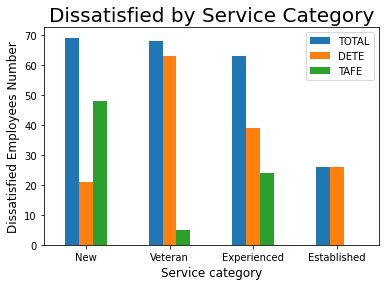

In [85]:
diss_sc.plot(kind='bar', rot = 0)
plt.title('Dissatisfied by Service Category', fontsize=20)
plt.xlabel('Service category', fontsize=12)
plt.ylabel('Dissatisfied Employees Number', fontsize=12)
plt.legend()
# use sns.despine()  and frameon = False to remove any borders

- Analysing the total dissatisfied columns, we can see that the <code>Veteran</code>,<code>New</code> and <code>Experienced</code> contribute in almost same proportions, at about 30%.

- In DETE Institute, the maximum percentage of dissatisfied employees are <code>Veteran</code> at 42.28 % while in TAFE Institute, the maximum percentage of dissatisfied employees are <code>New</code> at 55%.

- In every service category, DETE dominates as the institute with the higher number of employees leaving due to dissatisfaction, except for the <code>New</code> category.

- Overall, 73% of the employees left the DETE institute because of dissatisfaction issues, while only 27% of the employees from the TAFE institute left because of dissatsifaction.

In [86]:
combined[combined['institute']== 'TAFE']

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
308,6.341466e+17,2010.0,Teacher (including LVT),Permanent Full-time,Male,43.0,4.0,False,TAFE,Experienced,Middle
309,6.341475e+17,2010.0,Teacher (including LVT),Contract/casual,Female,56.0,0.0,False,TAFE,New,Senior
310,6.341520e+17,2010.0,Administration (AO),Temporary Full-time,Male,20.0,4.0,False,TAFE,Experienced,Junior
311,6.341537e+17,2010.0,Teacher (including LVT),Permanent Full-time,Male,48.0,4.0,False,TAFE,Experienced,Senior
312,6.341579e+17,2009.0,Tutor,Temporary Full-time,Female,38.0,4.0,False,TAFE,Experienced,Middle
...,...,...,...,...,...,...,...,...,...,...,...
593,6.350599e+17,2013.0,Administration (AO),Temporary Full-time,Female,28.0,2.0,False,TAFE,New,Junior
594,6.350660e+17,2013.0,Operational (OO),Temporary Full-time,Male,23.0,6.0,False,TAFE,Experienced,Junior
595,6.350668e+17,2013.0,Teacher (including LVT),Temporary Full-time,Male,53.0,2.0,False,TAFE,New,Senior
596,6.350704e+17,2013.0,Teacher (including LVT),Permanent Full-time,Female,53.0,6.0,False,TAFE,Experienced,Senior


In [87]:
fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(diss_sc.iloc[:,1], labels = diss_sc.index, colors = ('b','g','y','r'))
plt.title('DETE')

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(diss_sc.iloc[:,2], labels = diss_sc.index, colors = ('b','g','y','r'))
plt.title('TAFE')

Text(0.5, 1.0, 'TAFE')

## 

In [88]:
diss_ac = combined.pivot_table(index='age_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False).to_frame()

DETE_sc = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
diss_ac['DETE'] = DETE_sc.pivot_table(index='age_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

TAFE_sc = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
diss_ac['TAFE'] = TAFE_sc.pivot_table(index='age_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

diss_ac

,dissatisfied,DETE,TAFE
age_cat,,,
Senior,94,65,29
Middle,83,55,28
Junior,49,29,20


In [89]:
diss_ac.index.name = 'Service Category'
diss_ac

,dissatisfied,DETE,TAFE
Service Category,,,
Senior,94,65,29
Middle,83,55,28
Junior,49,29,20


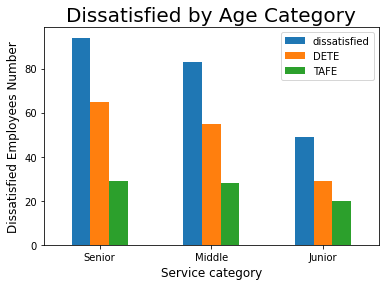

In [90]:
diss_ac.plot(kind='bar', rot = 0)
plt.title('Dissatisfied by Age Category', fontsize=20)
plt.xlabel('Service category', fontsize=12)
plt.ylabel('Dissatisfied Employees Number', fontsize=12)
plt.legend()
# use sns.despine()  and frameon = False to remove any borders

- Analysing the total dissatisfied columns, we can see that the <code>Senior</code> and <code>Middle</code> age groups are the most dissatisfied with their jobs. Almost 80% of the employees who left due to dissatisfaction are from the above age groups.

- In DETE Institute, the maximum percentage of dissatisfied employees are <code>Senior</code> at 43.6 % while in TAFE Institute, the maximum percentage of dissatisfied employees are <code>Senior</code> and <code>Middle</code> at about 37% each.

- In every service category, DETE dominates as the institute with the higher number of employees leaving due to dissatisfaction, as seen in the pie charts below.


In [91]:
fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(diss_ac.iloc[0,1:3], labels = diss_ac.columns[1:3], colors = ('orange','g'))
plt.title('SENIOR')

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(diss_ac.iloc[1,1:3], labels = diss_ac.columns[1:3], colors = ('orange','g'))
plt.title('MIDDLE')

ax1 = plt.subplot2grid((2, 4), (0, 2))
plt.pie(diss_ac.iloc[2,1:3], labels = diss_ac.columns[1:3], colors = ('orange','g'))
plt.title('JUNIOR')

Text(0.5, 1.0, 'JUNIOR')

## Conclusion

- Generally, the people who have served for more number of years or the ones who are older inn general are the ones to leave due to dissatisfaction in majority.


- Overall, 73% of the employees left the DETE institute because of dissatisfaction issues, while only 27% of the employees from the TAFE institute left because of dissatsifaction.